In [93]:
import json
import matplotlib.pyplot as plt
import statistics as stat
import numpy as np

In [94]:
with open('../../output/weights/p_date=2022-08-03-05_38_29/log.json', 'r') as f:
    data = json.load(f)
    
l = len(data["loss"])
print(f"{l} records")
print(data.keys())

9001 records
dict_keys(['loss', 'mae', 'accuracy', 'mean_q', 'episode_reward', 'nb_episode_steps', 'nb_steps', 'episode', 'duration'])


In [95]:
# Loss
loss = [ v for v in data["loss"] if str(v) != "nan" ][-50_000:]
mean_loss = stat.mean(loss)
loss_filtered = { k: v for k, v in enumerate(loss) }#if v <= mean_loss }

# Mae
mae = [ v for v in data["mae"] if str(v) != "nan" ]#[-50_000:]
mean_mae = stat.mean(mae)
mae_filtered = { k: v for k, v in enumerate(mae) }# if v <= mean_mae }

# Mean Q
mean_q = [ v for v in data["mean_q"] if str(v) != "nan" ]#[-50_000:]
mean_mean_q = stat.mean(mean_q)
mean_q_filtered = { k: v for k, v in enumerate(mean_q) }# if v <= mean_mean_q }

# Reward
reward = [ v for v in data["episode_reward"] if str(v) != "nan" ]#[-500:]
mean_reward = stat.mean(reward)
episode_reward = { k: v for k, v in enumerate(reward) }# if v <= mean_reward }

# Duration
duration = { k: v for k, v in enumerate(data["duration"]) if str(v) != "nan" }

# NB Episode steps
nb_episode_steps = { k: v for k, v in enumerate(data["nb_episode_steps"]) if str(v) != "nan" }

In [96]:
def plot(data, title, labelX, labelY):
    interval = 500
    index_0 = list(data.keys())[0]
    moving_average = { i + index_0 : stat.mean(list(data.values())[i:i+interval+1]) for i in range(0, len(data.values()), interval) }
    
    plt.figure(figsize=(15,5))
    plt.scatter(data.keys(), data.values())
    plt.plot(list(moving_average.keys()), list(moving_average.values()), color="red")
    plt.title(title)
    plt.xlabel(labelX)
    plt.ylabel(labelY)
    plt.show()
    
    print(f"Maximum: {max(data.values())}")
    print(f"Average: {sum(data.values()) / len(data.values())}")
    print(f"Moving Average: {moving_average}")
    print(f"Minimum: {min(data.values())}")

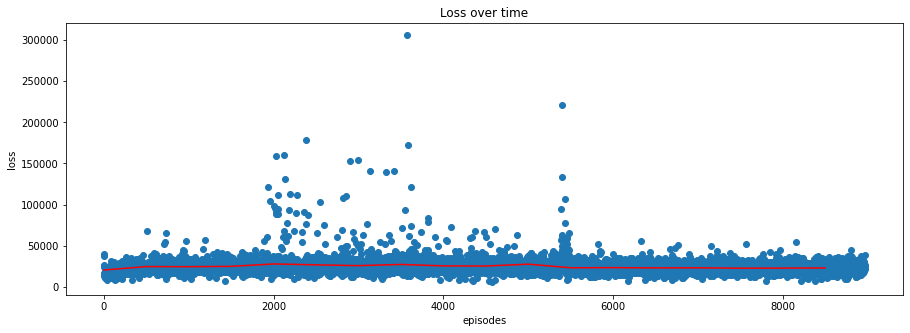

Maximum: 305870.15625
Average: 24427.1694808581
Moving Average: {0: 20321.04258677854, 500: 24523.642285741018, 1000: 24386.327884270522, 1500: 24807.294422873005, 2000: 27731.63729377183, 2500: 26648.006155657436, 3000: 25658.43201877495, 3500: 27129.821400168414, 4000: 25351.976873401632, 4500: 25192.84433086951, 5000: 27439.392999157935, 5500: 23076.88576947667, 6000: 23233.300508358283, 6500: 22922.521673449974, 7000: 23035.257906062874, 7500: 22542.83390738055, 8000: 22677.633507399263, 8500: 22865.730047242254}
Minimum: 5209.70751953125


In [97]:
plot(loss_filtered, "Loss over time", "episodes", "loss")

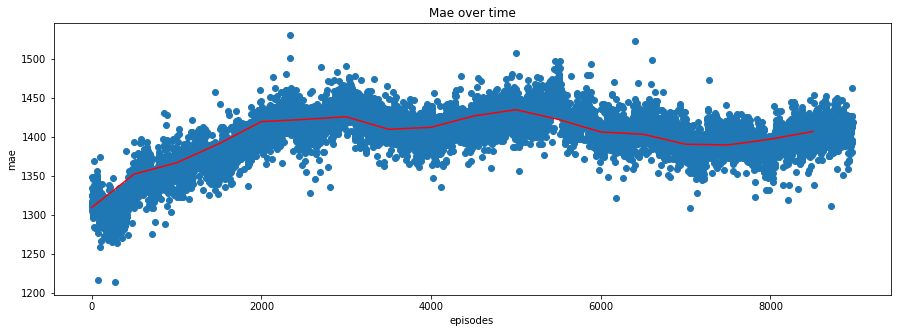

Maximum: 1530.2398681640625
Average: 1399.158919918419
Moving Average: {0: 1309.1665482126823, 500: 1352.0783805923309, 1000: 1366.6320220886353, 1500: 1391.1252468208115, 2000: 1419.4651566008608, 2500: 1422.2898577844312, 3000: 1425.7388504241517, 3500: 1409.68060972781, 4000: 1412.1798234585517, 4500: 1426.704853963947, 5000: 1434.8139258592191, 5500: 1422.387284269352, 6000: 1406.2080012338604, 6500: 1403.2888195776416, 7000: 1390.4831681851142, 7500: 1389.5927130114771, 8000: 1397.0036669824415, 8500: 1406.872557811248}
Minimum: 1213.0626220703125


In [98]:
plot(mae_filtered, "Mae over time", "episodes", "mae")

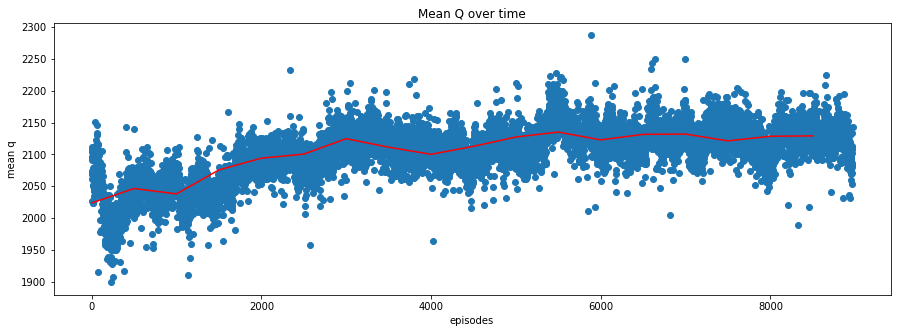

Maximum: 2287.14111328125
Average: 2102.901794142732
Moving Average: {0: 2023.5689296776513, 500: 2046.3698160319984, 1000: 2037.9139189881955, 1500: 2075.5776586475486, 2000: 2094.0464381296, 2500: 2100.415723971978, 3000: 2124.713720264549, 3500: 2111.355510658371, 4000: 2100.1065359515346, 4500: 2112.6899640660085, 5000: 2127.34412814995, 5500: 2135.09700715756, 6000: 2122.8305961319547, 6500: 2131.498626769898, 7000: 2131.896425410897, 7500: 2121.264466915778, 8000: 2128.528829304282, 8500: 2129.080251057943}
Minimum: 1898.6728515625


In [99]:
plot(mean_q_filtered, "Mean Q over time", "episodes", "mean q")

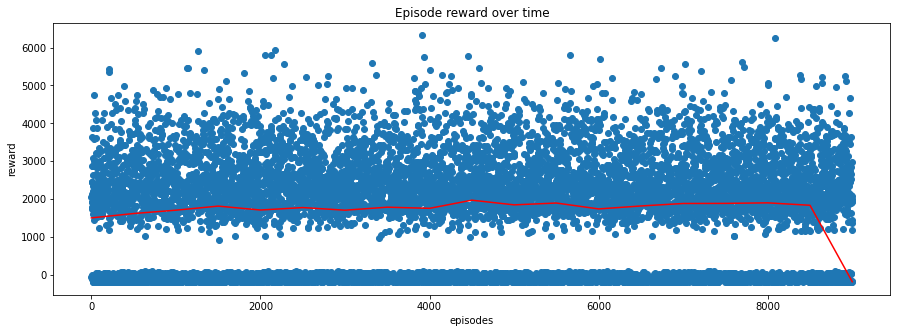

Maximum: 6326.340512820179
Average: 1781.570965505066
Moving Average: {0: 1498.4082041044444, 500: 1613.5349219507962, 1000: 1702.3475408156094, 1500: 1809.825641025458, 2000: 1706.726014637209, 2500: 1771.2344654279245, 3000: 1702.090370029, 3500: 1781.372175648533, 4000: 1751.1076708120474, 4500: 1966.6166845793618, 5000: 1843.0758697986648, 5500: 1891.2379190335378, 6000: 1735.578366344039, 6500: 1813.595426582571, 7000: 1879.288391422084, 7500: 1881.909783509721, 8000: 1896.240945800512, 8500: 1831.7851732430795, 9000: -190.85333333333335}
Minimum: -209.22205128205127


In [100]:
plot(episode_reward, "Episode reward over time", "episodes", "reward")

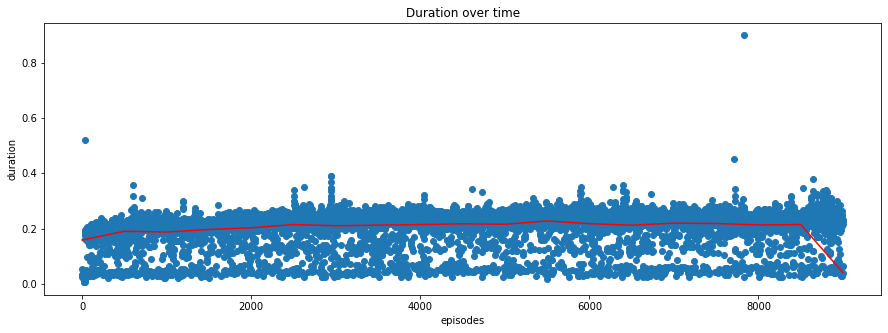

Maximum: 0.8991068160030409
Average: 0.20785167556113565
Moving Average: {0: 0.15834282611380507, 500: 0.19009171805784622, 1000: 0.18750785481049484, 1500: 0.1965772534988169, 2000: 0.20269799819166173, 2500: 0.2144760346606841, 3000: 0.21005073537317057, 3500: 0.21236476930324918, 4000: 0.21420157850698088, 4500: 0.21712805937106364, 5000: 0.21546714332745576, 5500: 0.2273243315530944, 6000: 0.21759049984427045, 6500: 0.21208492647889296, 7000: 0.21941703357079095, 7500: 0.2183027987703825, 8000: 0.21291523508988033, 8500: 0.21439323480838296, 9000: 0.04014477099553915}
Minimum: 0.004967294000380207


In [101]:
plot(duration, "Duration over time", "episodes", "duration")

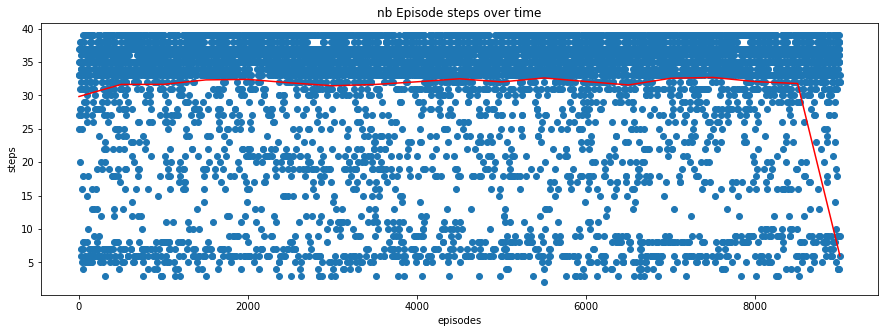

Maximum: 39
Average: 31.941673147428062
Moving Average: {0: 29.842315369261478, 500: 31.654690618762476, 1000: 31.660678642714572, 1500: 32.3313373253493, 2000: 32.405189620758485, 2500: 31.88622754491018, 3000: 31.45508982035928, 3500: 31.646706586826348, 4000: 32.047904191616766, 4500: 32.49700598802395, 5000: 32.02794411177645, 5500: 32.62075848303393, 6000: 32.08383233532934, 6500: 31.572854291417165, 7000: 32.5748502994012, 7500: 32.69860279441118, 8000: 32.075848303393215, 8500: 31.786427145708583, 9000: 6}
Minimum: 2


In [102]:
plot(nb_episode_steps, "nb Episode steps over time", "episodes", "steps")